In [ ]:
!pip install pandas scikit-learn numpy


In [2]:
# import the requirement libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.utils import shuffle

In [4]:
# load the data
df =pd.read_csv('/content/Fraud.csv')
print("Successfully loaded the data")


Successfully loaded the data


**Analyse the data**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97225 entries, 0 to 97224
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            97225 non-null  int64  
 1   type            97225 non-null  object 
 2   amount          97225 non-null  float64
 3   nameOrig        97225 non-null  object 
 4   oldbalanceOrg   97225 non-null  float64
 5   newbalanceOrig  97225 non-null  float64
 6   nameDest        97225 non-null  object 
 7   oldbalanceDest  97225 non-null  float64
 8   newbalanceDest  97224 non-null  float64
 9   isFraud         97224 non-null  float64
 10  isFlaggedFraud  97224 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 8.2+ MB


In [6]:
df.sample(8) # sample of the data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
65565,9,CASH_IN,151657.34,C819383281,1230.00,152887.34,C1109485117,443539.10,503219.50,0.0,0.0
95902,10,CASH_OUT,85738.89,C1709185383,440.00,0.00,C1474544725,198171.00,470554.48,0.0,0.0
5008,5,CASH_IN,133038.81,C711964207,6198727.47,6331766.28,C909295153,7093793.67,6661385.87,0.0,0.0
41409,9,CASH_IN,180941.45,C1685725680,209380.00,390321.45,C1498054790,88976.00,0.00,0.0,0.0
41641,9,CASH_OUT,239286.88,C1636606740,77882.00,0.00,C1121729242,18795.00,265222.87,0.0,0.0
92065,10,TRANSFER,1374469.26,C1392404631,194.00,0.00,C1423125072,84223.24,1726713.28,0.0,0.0
40024,9,PAYMENT,34852.96,C604841532,40084.00,5231.04,M1757475031,0.00,0.00,0.0,0.0
42782,9,CASH_OUT,186303.71,C799777630,0.00,0.00,C814886797,208736.40,395040.12,0.0,0.0


In [7]:
# checking the null values in the data
df.isnull().sum()

,0
step,0
type,0
amount,0
nameOrig,0
oldbalanceOrg,0
newbalanceOrig,0
nameDest,0
oldbalanceDest,0
newbalanceDest,1
isFraud,1


not much values are null, so no need to impute it so easily  we can remove the null values in the data.

In [8]:
# checking how's the look mathematically
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,97225.000000,9.722500e+04,9.722500e+04,9.722500e+04,9.722500e+04,9.722400e+04,97224.000000,97224.0
mean,8.456817,1.724217e+05,8.793150e+05,8.956148e+05,8.792683e+05,1.182315e+06,0.001173,0.0
std,1.833480,3.419651e+05,2.689865e+06,2.727826e+06,2.403354e+06,2.802840e+06,0.034223,0.0
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,8.000000,9.893120e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,9.000000,5.208135e+04,1.994700e+04,0.000000e+00,2.080800e+04,4.894480e+04,0.000000,0.0
75%,10.000000,2.103607e+05,1.863453e+05,2.107046e+05,5.853365e+05,1.051531e+06,0.000000,0.0
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.397234e+07,1.000000,0.0


In [9]:
#  value count of the output column
df['isFraud'].value_counts(normalize=True)

,proportion
isFraud,
0.0,0.998827
1.0,0.001173


so , we should focus that sample of the data is to much imbalance

below is the visualization of the target column given in the dataset

Text(0.5, 1.0, 'Fraud vs Non-Fraud Count')

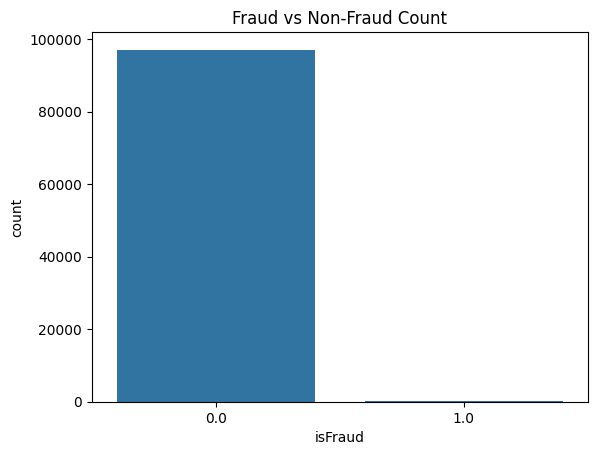

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='isFraud', data=df)
plt.title('Fraud vs Non-Fraud Count')


In [11]:
print("Transaction Types Distribution:")
print(df['type'].value_counts())

Transaction Types Distribution:
type
PAYMENT     38478
CASH_OUT    29839
CASH_IN     19561
TRANSFER     8371
DEBIT         976
Name: count, dtype: int64


/tmp/ipython-input-12-1519864297.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='Set2')


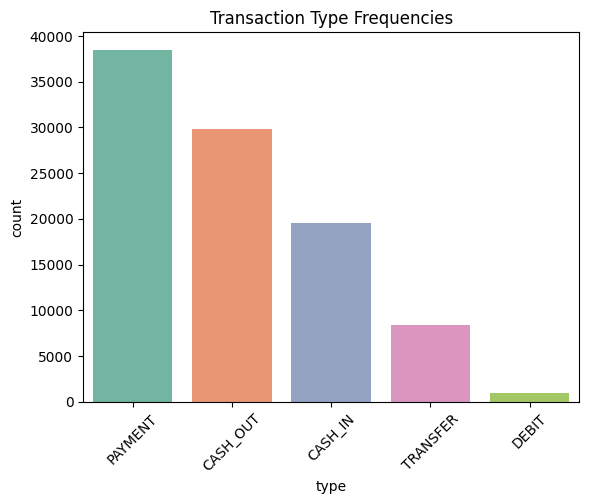

In [12]:
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='Set2')
plt.title('Transaction Type Frequencies')
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.0, 'Transaction Type vs Fraud')

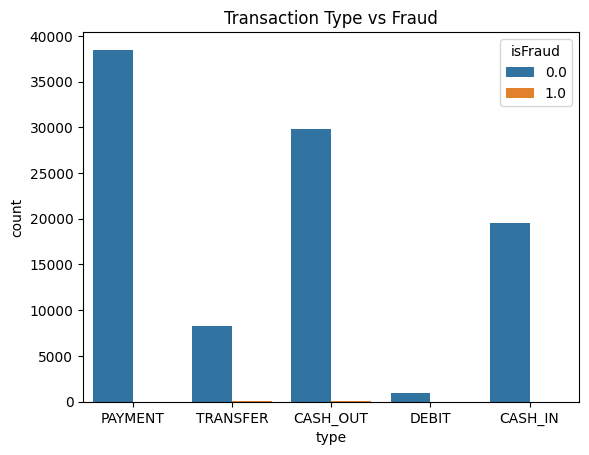

In [13]:
sns.countplot(x='type', hue='isFraud', data=df)
plt.title('Transaction Type vs Fraud')

from above , we can concude that only "transfer" and "Cash_out" have the fraud value true.
So , in trasaction only there two plays critical role and rest of them we will futher remove it

Numerical values of the fraud Distribution

In [14]:
# types of Fraud Distribution
fraud_by_type = df.groupby('type')['isFraud'].value_counts().unstack().fillna(0)
print("Fraud by Transaction Type:")
print(fraud_by_type)

Fraud by Transaction Type:
isFraud       0.0   1.0
type                   
CASH_IN   19561.0   0.0
CASH_OUT  29781.0  58.0
DEBIT       976.0   0.0
PAYMENT   38477.0   0.0
TRANSFER   8315.0  56.0


<Axes: xlabel='isFraud', ylabel='amount'>

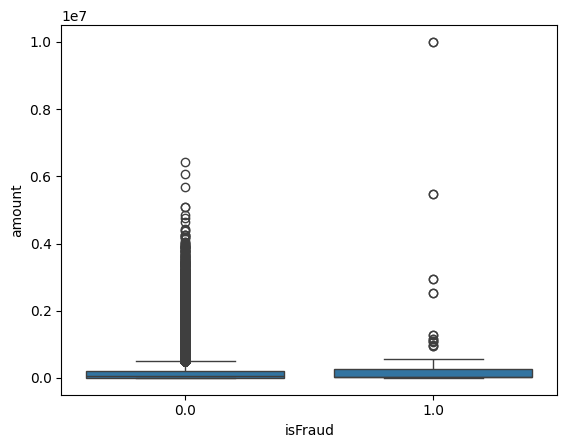

In [15]:
sns.boxplot(x='isFraud', y='amount', data=df)

Note : here no need to remove the outliers because they have fraud value and there is only only outlier that is not fraud

Checking the behaviour of the account's amount  

In [16]:
# Balance Checks
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

print("\n🔹 Mean balanceDiffOrig (Fraud vs Non-Fraud):")
print(df.groupby('isFraud')['balanceDiffOrig'].mean())

print("\n🔹 Mean balanceDiffDest (Fraud vs Non-Fraud):")
print(df.groupby('isFraud')['balanceDiffDest'].mean())


🔹 Mean balanceDiffOrig (Fraud vs Non-Fraud):
isFraud
0.0    -16934.191631
1.0    523984.454386
Name: balanceDiffOrig, dtype: float64

🔹 Mean balanceDiffDest (Fraud vs Non-Fraud):
isFraud
0.0    302883.418576
1.0    434006.169737
Name: balanceDiffDest, dtype: float64


It conclude that : how the money flow differs in fraudulent vs. normal transactions


🔹 Merchant Fraud Stats:
isMerchant        0        1
isFraud                     
0.0         58633.0  38477.0
1.0           114.0      0.0


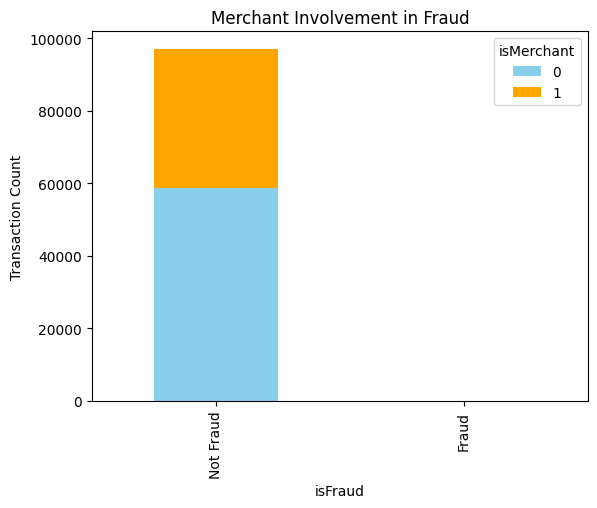

In [17]:
# Merchants Check
df['isMerchant'] = df['nameDest'].str.startswith("M").astype(int)
merchant_stats = df.groupby(['isFraud', 'isMerchant']).size().unstack().fillna(0)

print("\n🔹 Merchant Fraud Stats:")
print(merchant_stats)

merchant_stats.plot(kind='bar', stacked=True, color=['skyblue', 'orange'])
plt.title("Merchant Involvement in Fraud")
plt.ylabel("Transaction Count")
plt.xticks(ticks=[0,1], labels=["Not Fraud", "Fraud"])
plt.show()

Conclude that Merchant not involve in the fraud transaction

# After permoming EDA , starting building the model

In [18]:
# Feature engineering
df['balanceDiffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['balanceDiffDest'] = df['newbalanceDest'] - df['oldbalanceDest']
df['zeroBalanceAfter'] = (df['newbalanceOrig'] == 0).astype(int)
df['emptyDestBefore'] = (df['oldbalanceDest'] == 0).astype(int)
df['isMerchant'] = df['nameDest'].fillna('').astype(str).str.startswith('M').astype(int)

In [19]:
# Filter fraud-related transaction types only
df = df[df['type'].isin(['TRANSFER', 'CASH_OUT'])].copy()

In [20]:
# 🔧 Convert 'type' to numeric
df['type'] = df['type'].map({'TRANSFER': 0, 'CASH_OUT': 1})

In [21]:
#  Drop rows with missing target
df = df[df['isFraud'].notna()]


In [22]:
# Drop irrelevant columns
df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)

In [23]:
# Drop rows where 'isFraud' is NaN because only 1 value is null
df = df[df['isFraud'].notna()]

In [24]:
# Define features and target
X = df.drop(columns=['isFraud'])
y = df['isFraud']

# Shuffle dataset to avoid order bias
X, y = shuffle(X, y, random_state=42)


In [25]:
#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# ML algo

In [35]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_score, recall_score
import time

1. Checking result on the Random Forest

In [27]:
#-------------------- RANDOM FOREST --------------------
print("Training on Random Forest...")
start_rf = time.time()
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start_rf

# Predict and evaluate
rf_pred = rf.predict(X_test)
rf_proba = rf.predict_proba(X_test)[:, 1]

print(f"Random Forest Results (trained in {int(rf_time)}s):")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("ROC AUC Score:", roc_auc_score(y_test, rf_proba))

Training on Random Forest...
Random Forest Results (trained in 3s):
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9524
         1.0       0.75      0.41      0.53        29

    accuracy                           1.00      9553
   macro avg       0.87      0.71      0.77      9553
weighted avg       1.00      1.00      1.00      9553

Confusion Matrix:
 [[9520    4]
 [  17   12]]
ROC AUC Score: 0.9619255890744254


Note: Random Forest had higher precision and trained faster.

2. GRADIENT BOOSTING

In [28]:
# -------------------- GRADIENT BOOSTING --------------------
print("Training Gradient Boosting...")
start_gb = time.time()
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)
gb.fit(X_train, y_train)
gb_time = time.time() - start_gb

# Predict and evaluate
gb_pred = gb.predict(X_test)
gb_proba = gb.predict_proba(X_test)[:, 1]

print(f"Gradient Boosting Results (trained in {int(gb_time)}s):")
print("Classification Report:\n", classification_report(y_test, gb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, gb_pred))
print("ROC AUC Score:", roc_auc_score(y_test, gb_proba))

Training Gradient Boosting...
Gradient Boosting Results (trained in 7s):
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9524
         1.0       0.71      0.41      0.52        29

    accuracy                           1.00      9553
   macro avg       0.85      0.71      0.76      9553
weighted avg       1.00      1.00      1.00      9553

Confusion Matrix:
 [[9519    5]
 [  17   12]]
ROC AUC Score: 0.9767031383510261


Note : Gradient Boosting had higher AUC and better at catching edge cases.

# which model

As the result of both different model both had lower recall individually, meaning they were missing frauds.

So I used a soft voting ensemble to:

1.   Leverage Random Forest’s robustness
2.   Capture Gradient Boosting’s sensitivity
3.   Increase recall and precision together without sacrificing much

As a result, the ensemble caught more frauds and made fewer false alerts, which is critical in real fraud systems.



In [30]:
# Define Base model
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42)


In [31]:
# Combine with Soft Voting
ensemble = VotingClassifier(estimators=[
    ('rf', rf),
    ('gb', gb)
], voting='soft')

In [32]:
# Training Soft Voting Ensemble...
start = time.time()
ensemble.fit(X_train, y_train)
elapsed = time.time() - start
print(f"✅ Training completed in {int(elapsed)} seconds.\n")

✅ Training completed in 10 seconds.



In [33]:
# Evaluate Performance of the model
y_pred = ensemble.predict(X_test)
y_proba = ensemble.predict_proba(X_test)[:, 1]

In [36]:
print("Ensemble Model Performance (Soft Voting):")

print("Classification Report:\n", classification_report(y_test, y_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

print("Precision (Fraud):", round(precision_score(y_test, y_pred), 2))

print("Recall (Fraud):", round(recall_score(y_test, y_pred), 2))

print("ROC AUC Score:", round(roc_auc_score(y_test, y_proba), 3))

Ensemble Model Performance (Soft Voting):
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      9524
         1.0       0.92      0.41      0.57        29

    accuracy                           1.00      9553
   macro avg       0.96      0.71      0.79      9553
weighted avg       1.00      1.00      1.00      9553

Confusion Matrix:
 [[9523    1]
 [  17   12]]
Precision (Fraud): 0.92
Recall (Fraud): 0.41
ROC AUC Score: 0.978
